In [28]:
import pandas as pd
import numpy as np
import seaborn as sns

In [59]:
data = pd.read_csv(r"/COVIDSenti-A.csv")
data.head()


,tweet,label
0,Coronavirus | Human Coronavirus Types | CDC ht...,neu
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona...",neu
2,"TLDR: Not SARS, possibly new coronavirus. Diff...",neg
3,Disease outbreak news from the WHO: Middle Eas...,neu
4,China - Media: WSJ says sources tell them myst...,neu


In [60]:
data['tweet'][15:]

15       The new coronavirus identified by Chinese scie...
16       @KariDebbink @Vineet321 The Frieman Scary Scal...
17       Genome sequence of the new coronavirus associa...
18       Crap, a quick blast search suggests the Wuhan ...
19       .@hayesluk summarises novel coronavirus lab fi...
                               ...                        
29995    CDC: Re-test confirms Westerdam cruise ship pa...
29996    Two doctors die of coronavirus within 24 hours...
29997    BEIJING - The lockdown of Guo Jing's neighbour...
29998    #CoronavirusOutbreak in #Balochistan !!\n#CPEC...
29999    The Australian dollar has hit a fresh decade l...
Name: tweet, Length: 29985, dtype: object

In [61]:
data.isnull().sum()

tweet    0
label    0
dtype: int64

In [62]:
data['label'].value_counts()

neu    22949
neg     5083
pos     1968
Name: label, dtype: int64

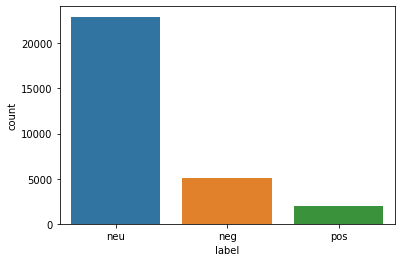

In [65]:
sns.countplot(x='label',data =data)

In [66]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


In [67]:
def preprocess_word(word):
    # Remove punctuation
    word = word.strip('\'"?!,.():;')
    # Convert more than 2 letter repetitions to 2 letter
    # funnnnny --> funny
    word = re.sub(r'(.)\1+', r'\1\1', word)
    # Remove - & '
    word = re.sub(r'(-|\')', '', word)
    return word


In [68]:
def preprocess_tweet(tweet):
    processed_tweet = []
    tweet = tweet.lower()
    tweet = re.sub(r'((www\.[\S]+)|(https?://[\S]+))', ' ', tweet)
    tweet = re.sub(r'@[\S]+','', tweet)
    tweet = re.sub(r'#(\S+)', r' \1 ', tweet)
    tweet = re.sub(r'\brt\b', '', tweet)
    tweet = re.sub(r'\.{2,}', ' ', tweet)
    tweet = tweet.strip(' "\'')
    tweet = re.sub(r'\s+', ' ', tweet)
    words = tweet.split()
    ps = PorterStemmer()

    for word in words:
        word = preprocess_word(word)
        #word = str(ps.stem(word))
        processed_tweet.append(word)
    filtered_words = [w for w in processed_tweet if not w in stop_words]
            
    return ' '.join(filtered_words)


In [71]:
data['clean_tweet'] = data['tweet'].apply(lambda x:preprocess_tweet(x))

In [72]:
data.head()


,tweet,label,clean_tweet
0,Coronavirus | Human Coronavirus Types | CDC ht...,neu,coronavirus | human coronavirus types | cdc
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona...",neu,that‚äôs üíø true corona virus swine flue bi...
2,"TLDR: Not SARS, possibly new coronavirus. Diff...",neg,tldr sars possibly new coronavirus difficult c...
3,Disease outbreak news from the WHO: Middle Eas...,neu,disease outbreak news middle east respiratory ...
4,China - Media: WSJ says sources tell them myst...,neu,china media wsj says sources tell mystery pne...


In [49]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [73]:
X = data['clean_tweet']

In [74]:
y = data['label']

In [75]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=68)

In [76]:
print(x_train.shape,x_test.shape)

(24000,) (6000,)


In [77]:
tfv=TfidfVectorizer()
train_vec = tfv.fit_transform(x_train)
test_vec = tfv.transform(x_test)

In [78]:
model=SVC(kernel='linear')
model.fit(train_vec,y_train)
pred=model.predict(test_vec)

In [79]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))

0.8956666666666667


In [80]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay



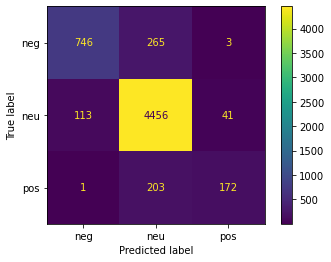

In [81]:
ConfusionMatrixDisplay.from_predictions(y_test,pred)